In [1]:
# Created 05/3/19 by A.T. (tropiano.4@osu.edu)

# Description here.

from os import chdir, getcwd
import matplotlib.colors as colors
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
# Scripts made by A.T.
from deuteron import Deuteron
from Figures import figures_functions as ff
from Potentials.vsrg_macos import load_save_potentials as lp
from SRG_codes.srg_unitary_transformation import SRG_unitary_transformation

__FUNCTIONS USED FOR PLOTTING OPERATORS__

In [2]:
def momentum_proj_operator_contours(q, kvnn, channel, kmax, kmid, ntot, method, generator, lambda_bd=0.00):
    '''Plots the <k|a^dagger_q a_q|k'> matrix elements depicting the SRG/Magnus evolution from lambda = 10.0 to 1.2 
    fm^-1. This is a 1 x 4 figure.'''
    
    # Arguments
    
    # q (float): Momentum value in fm^-1
    # kvnn (integer): This number specifies the potential
    # channel (string): The partial wave channel ('1S0', '3S1', etc.)
    # kmax (float): Maximum value in the momentum mesh
    # kmid (float): Mid-point value in the momentum mesh
    # ntot (integer): Number of momentum points in mesh
    # method (string): The evolution method ('srg' or 'magnus')
    # generator (string): SRG generator ('Wegner', 'T', 'Block-diag')
    # lambda_bd (float): Lambda value for block-diagonal decoupling (e.g. 2.00 fm^-1)
    
    cwd = getcwd()
    
    # Load momentum array
    k_array, k_weights = lp.load_momentum(kvnn, channel, kmax, kmid, ntot)
    # Contour limit of momentum
    xy_max = 4.0 
    
    # Pick the nearest value of q
    k_diff_array = abs(k_array-q)
    k_diff_min = min(k_diff_array)
    q_index = list(k_diff_array).index(k_diff_min)
    # Reset q to an actual value in k_array (this is the closest value to entered q)
    q = k_array[q_index]
    
    # Initialize dictionary to store operator for different lambda values
    d = {}
    
    # Load initial Hamiltonian and initialize deuteron class
    H0_matrix = lp.load_hamiltonian(kvnn, channel, kmax, kmid, ntot, method='initial')
    D = Deuteron(H0_matrix, k_array, k_weights)
    
    # Update dictionary with evolved operators
    lambda_list = [10.0,2.8,2.0,1.2]
    for lamb in lambda_list:
        
        # Load evolved Hamiltonian
        Hs_matrix = lp.load_hamiltonian(kvnn, channel, kmax, kmid, ntot, method, generator, lamb, lambda_bd)
        # Load unitary transformation
        Us_matrix = SRG_unitary_transformation(H0_matrix, Hs_matrix)

        momentum_proj_operator = D.momentum_proj_operator(q,U=Us_matrix)[:120,:120] # Unitless
        
        # Divide out momenta and weights for mesh-independent operator
        row, col = np.meshgrid(k_array*np.sqrt(k_weights), k_array*np.sqrt(k_weights))
        momentum_proj_operator_units = momentum_proj_operator/row/col
        
        # Interpolate matrix for pretty contours
        k, operator = ff.interpolate_matrix(k_array, momentum_proj_operator_units, xy_max)

        # Add to dictionary
        d[lamb] = operator
        
    # Limits of color bar in fm
    mx = 0.01
    mn = -0.01
    color_style = 'jet'
    #color_style = 'seismic'
    
    # Potential label
    p_lbl = ff.kvnn_label_conversion(kvnn)
    
    # Generator label
    if generator == 'Wegner':
        g_lbl = r'$G=H_D$'
    elif generator == 'T':
        g_lbl = r'$G=T_{rel}$'
        
    # Location of labels
    if q < xy_max/2:
        q_loc = 7
        p_loc = 7
        g_loc = 7
        lamb_loc = 3
    else:
        q_loc = 6
        p_loc = 6
        g_loc = 6
        lamb_loc = 2
    
    # Plot 1x4 figure     
    plt.close('all')
    
    f, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,sharex=True,sharey=True,figsize=(16,6))
    
    # lambda = 10.0 fm^-1
    ax1.pcolormesh(k, k, d[lambda_list[0]], vmin=mn, vmax=mx, cmap=color_style)
    ax1.set_xlim([0,xy_max])
    ax1.set_ylim([0,xy_max])
    ax1.set_xlabel(r"$k \/ \/ [fm^{-1}]$", fontsize=16)
    ax1.set_ylabel(r"$k' \/ \/ [fm^{-1}]$", fontsize=16)
    stepsize = 1.0
    ax1.xaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax1.yaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=True)
    anchored_text_1 = AnchoredText(r'$q=%.2f\/fm^{-1}$'%q, prop=dict(size=15), loc=q_loc, frameon=False)
    ax1.add_artist(anchored_text_1)
    anchored_text_2 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[0], prop=dict(size=18), loc=lamb_loc, \
                                   frameon=False)
    ax1.add_artist(anchored_text_2)
    ax1.set_aspect(aspect='equal')
    
    # lambda = 2.8 fm^-1
    ax2.pcolormesh(k, k, d[lambda_list[1]], vmin=mn, vmax=mx, cmap=color_style)
    ax2.set_xlim([0,xy_max])
    ax2.set_ylim([0,xy_max])
    ax2.set_xlabel(r"$k \/ \/ [fm^{-1}]$", fontsize=16)
    ax2.xaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax2.yaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop=True)
    anchored_text_3 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[1], prop=dict(size=18), loc=lamb_loc, \
                                   frameon=False)
    ax2.add_artist(anchored_text_3)
    ax2.set_aspect(aspect='equal')
    
    # lambda = 2.0 fm^-1
    ax3.pcolormesh(k, k, d[lambda_list[2]], vmin=mn, vmax=mx, cmap=color_style)
    ax3.set_xlim([0,xy_max])
    ax3.set_ylim([0,xy_max])
    ax3.set_xlabel(r"$k \/ \/ [fm^{-1}]$", fontsize=16)
    ax3.xaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax3.yaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax3.xaxis.set_label_position('top')
    ax3.xaxis.tick_top()
    ax3.tick_params(labeltop=True)
    anchored_text_4 = AnchoredText(p_lbl, prop=dict(size=18), loc=p_loc, frameon=False)
    ax3.add_artist(anchored_text_4)
    anchored_text_5 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[2], prop=dict(size=18), loc=lamb_loc, \
                                   frameon=False)
    ax3.add_artist(anchored_text_5)
    ax3.set_aspect(aspect='equal')

    # lambda = 1.2 fm^-1
    c = ax4.pcolormesh(k, k, d[lambda_list[3]], vmin=mn, vmax=mx, cmap=color_style)
    ax4.set_xlim([0,xy_max])
    ax4.set_ylim([0,xy_max])
    ax4.set_xlabel(r"$k \/ \/ [fm^{-1}]$", fontsize=16)
    ax4.xaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax4.yaxis.set_ticks(np.arange(0.0, xy_max+stepsize, stepsize))
    ax4.xaxis.set_label_position('top')
    ax4.xaxis.tick_top()
    ax4.tick_params(labeltop=True)
    anchored_text_6 = AnchoredText(g_lbl, prop=dict(size=18), loc=g_loc, frameon=False)
    ax4.add_artist(anchored_text_6)
    anchored_text_7 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[3], prop=dict(size=18), loc=lamb_loc, \
                                   frameon=False)
    ax4.add_artist(anchored_text_7)
    ax4.set_aspect(aspect='equal')

    plt.gca().invert_yaxis()
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = f.colorbar(c, cax=cbar_ax)
    cbar.set_label(r'$[fm^3]$', rotation=0, labelpad=25, fontsize=18)
    
    # Name of jpeg file
    #q_string = 'q%.2f'%q
    #q_string = q_string[:2]+','+q_string[3:]
    #if potential == 'AV18' or potential == 'EM':
        #name = 'momentum_proj_operator_contours_%s_%s_%s'%(q_string,method,potential) 
    #else:
        #name = 'momentum_proj_operator_contours_%s_%s_%s_Lamb%s'%(q_string,method,potential,lambda_eft) 
        
    # Save figure
    #chdir('Figures/May_2019')
    #f.savefig(name+'.jpg',bbox_inches='tight')
    #chdir(cwd)  
    
    plt.show()

In [3]:
def momentum_proj_operator_contours_logscale(q,method,potential,lambda_eft,k=6,ds=1e-5):
    '''Same as above but on a log-scale.'''
    
    cwd = getcwd()
    
    # Load momentum array
    gp,gw = load_momentum_weights(potential)
    # Limit of momentum
    k_max = 5.0 
    
    # Pick the nearest value of q
    k_diff_array = abs(gp-q)
    k_diff_min = min(k_diff_array)
    q_index = list(k_diff_array).index(k_diff_min)
    # Reset q to an actual value in gp mesh (this is the closest value to entered q)
    q = gp[q_index]
    
    # Initialize dictionary to store operator for different lambda values
    d = {}
    
    # Load initial Hamiltonian
    H0_matrix = load_initial_matrix(potential,lambda_eft)
    D = deuteron(H0_matrix,gp,gw)
    
    # Update dictionary with evolved operators
    lambda_list = [10.0,2.8,2.0,1.2]
    gen_list = ['Wegner','T']
    for gen in gen_list:
        d[gen] = {}
        for lamb in lambda_list:
            Us_matrix = load_unitary_transformation(method,potential,lambda_eft,gen,lamb,k,ds)
            k_array,operator = interpolate_matrix(gp,D.momentum_proj_operator(q,U=Us_matrix)[:120,:120],k_max)
            d[gen][lamb] = abs(operator)
        
    # Color style
    cs = 'Blues'
    
    # Potential label
    if potential == 'Wendt':
        p_lbl = r'$\Lambda = %s \/ fm^{-1}$'%lambda_eft
    elif potential == 'EM':
        p_lbl = 'N3LO'
    elif potential == 'AV18':
        p_lbl = potential
        
    # Location of labels and limits of color bar in fm
    if q < k_max/2:
        q_loc = 4
        p_loc = 4
        g_loc = 7
        lamb_loc = 4
        mx = 1e0
        mn = 1e-5
    else:
        q_loc = 3
        p_loc = 3
        g_loc = 2
        lamb_loc = 3
        mx = 1e-1
        mn = 1e-5
    
    # Plot 2x4 figure     
    plt.close('all')
    
    f,((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4,sharex=True,sharey=True,figsize=(16,7))
    
    # G = H_D
    # lambda = 10.0 fm^-1
    ax1.pcolormesh(k_array,k_array,d[gen_list[0]][lambda_list[0]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax1.set_xlim([0,k_max])
    ax1.set_ylim([0,k_max])
    ax1.set_xlabel(r"$k \/ \/ [fm^{-1}]$",fontsize=16)
    ax1.set_ylabel(r"$k' \/ \/ [fm^{-1}]$",fontsize=16)
    stepsize = 1.0
    ax1.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax1.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=True)
    anchored_text_1 = AnchoredText(r'$G=H_D$',prop=dict(size=18),loc=g_loc,frameon=False)
    ax1.add_artist(anchored_text_1)
    ax1.set_aspect(aspect='equal')
    
    # G = H_D
    # lambda = 2.8 fm^-1
    ax2.pcolormesh(k_array,k_array,d[gen_list[0]][lambda_list[1]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax2.set_xlim([0,k_max])
    ax2.set_ylim([0,k_max])
    ax2.set_xlabel(r"$k \/ \/ [fm^{-1}]$",fontsize=16)
    ax2.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax2.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax2.xaxis.set_label_position('top')
    ax2.xaxis.tick_top()
    ax2.tick_params(labeltop=True)
    ax2.set_aspect(aspect='equal')
    
    # G = H_D
    # lambda = 2.0 fm^-1
    ax3.pcolormesh(k_array,k_array,d[gen_list[0]][lambda_list[2]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax3.set_xlim([0,k_max])
    ax3.set_ylim([0,k_max])
    ax3.set_xlabel(r"$k \/ \/ [fm^{-1}]$",fontsize=16)
    ax3.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax3.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax3.xaxis.set_label_position('top')
    ax3.xaxis.tick_top()
    ax3.tick_params(labeltop=True)
    anchored_text_3 = AnchoredText(p_lbl,prop=dict(size=18),loc=p_loc,frameon=False)
    ax3.add_artist(anchored_text_3)
    ax3.set_aspect(aspect='equal')
    
    # G = H_D
    # lambda = 1.2 fm^-1
    ax4.pcolormesh(k_array,k_array,d[gen_list[0]][lambda_list[3]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax4.set_xlim([0,k_max])
    ax4.set_ylim([0,k_max])
    ax4.set_xlabel(r"$k \/ \/ [fm^{-1}]$",fontsize=16)
    ax4.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax4.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax4.xaxis.set_label_position('top')
    ax4.xaxis.tick_top()
    ax4.tick_params(labeltop=True)
    anchored_text_4 = AnchoredText(r'$q=%.2f\/fm^{-1}$'%q,prop=dict(size=15),loc=q_loc,frameon=False)
    ax4.add_artist(anchored_text_4)
    ax4.set_aspect(aspect='equal')
    
    # G = T_rel
    # lambda = 10.0 fm^-1
    ax5.pcolormesh(k_array,k_array,d[gen_list[1]][lambda_list[0]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax5.set_xlim([0,k_max])
    ax5.set_ylim([0,k_max])
    ax5.set_ylabel(r"$k' \/ \/ [fm^{-1}]$",fontsize=16)
    ax5.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax5.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax5.xaxis.set_label_position('top')
    ax5.xaxis.tick_top()
    ax5.tick_params(labeltop=False)
    anchored_text_5 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[0],prop=dict(size=18),loc=lamb_loc,frameon=False)
    ax5.add_artist(anchored_text_5)
    anchored_text_55 = AnchoredText(r'$G=T_{rel}$',prop=dict(size=18),loc=g_loc,frameon=False)
    ax5.add_artist(anchored_text_55)
    ax5.set_aspect(aspect='equal')
    
    # G = T_rel
    # lambda = 2.8 fm^-1
    ax6.pcolormesh(k_array,k_array,d[gen_list[1]][lambda_list[1]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax6.set_xlim([0,k_max])
    ax6.set_ylim([0,k_max])
    ax6.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax6.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax6.xaxis.set_label_position('top')
    ax6.xaxis.tick_top()
    ax6.tick_params(labeltop=False)
    anchored_text_6 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[1],prop=dict(size=18),loc=lamb_loc,frameon=False)
    ax6.add_artist(anchored_text_6)
    ax6.set_aspect(aspect='equal')
    
    # G = T_rel
    # lambda = 2.0 fm^-1
    ax7.pcolormesh(k_array,k_array,d[gen_list[1]][lambda_list[2]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax7.set_xlim([0,k_max])
    ax7.set_ylim([0,k_max])
    ax7.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax7.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax7.xaxis.set_label_position('top')
    ax7.xaxis.tick_top()
    ax7.tick_params(labeltop=False)
    anchored_text_7 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[2],prop=dict(size=18),loc=lamb_loc,frameon=False)
    ax7.add_artist(anchored_text_7)
    ax7.set_aspect(aspect='equal')
    
    # G = T_rel
    # lambda = 1.2 fm^-1
    c = ax8.pcolormesh(k_array,k_array,d[gen_list[1]][lambda_list[3]],norm=colors.LogNorm(vmin=mn,vmax=mx),cmap=cs)
    ax8.set_xlim([0,k_max])
    ax8.set_ylim([0,k_max])
    ax8.xaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax8.yaxis.set_ticks(np.arange(0.0,k_max+stepsize,stepsize))
    ax8.xaxis.set_label_position('top')
    ax8.xaxis.tick_top()
    ax8.tick_params(labeltop=False)
    anchored_text_8 = AnchoredText(r'$\lambda=%.1f\/fm^{-1}$'%lambda_list[3],prop=dict(size=18),loc=lamb_loc,frameon=False)
    ax8.add_artist(anchored_text_8)
    ax8.set_aspect(aspect='equal')

    plt.gca().invert_yaxis()
    f.subplots_adjust(hspace=0.1,wspace=0.1)
    f.subplots_adjust(right=0.8)
    cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    cbar = f.colorbar(c,cax=cbar_ax,format='%.1e')
    cbar.set_label(r'$[fm^3]$',rotation=0,labelpad=25,fontsize=18)
    
    # Name of jpeg file
    q_string = 'q%.2f'%q
    q_string = q_string[:2]+','+q_string[3:]
    if potential == 'AV18' or potential == 'EM':
        name = 'momentum_proj_operator_contours_logscale_%s_%s_%s'%(q_string,method,potential) 
    else:
        name = 'momentum_proj_operator_contours_logscale_%s_%s_%s_Lamb%s'%(q_string,method,potential,lambda_eft) 
        
    # Save figure
    chdir('Figures/May_2019')
    f.savefig(name+'.jpg',bbox_inches='tight')
    chdir(cwd) 

__RUN FUNCTIONS IN THE CELL BELOW__

In [4]:
# Test on EM N3LO
kvnn = 10
channel = '3S1'
kmax = 30.0
#kmax = 8.0
kmid = 4.0
#kmid = 2.0
ntot = 120

# SRG specifications
method = 'srg'
generator = 'Wegner'

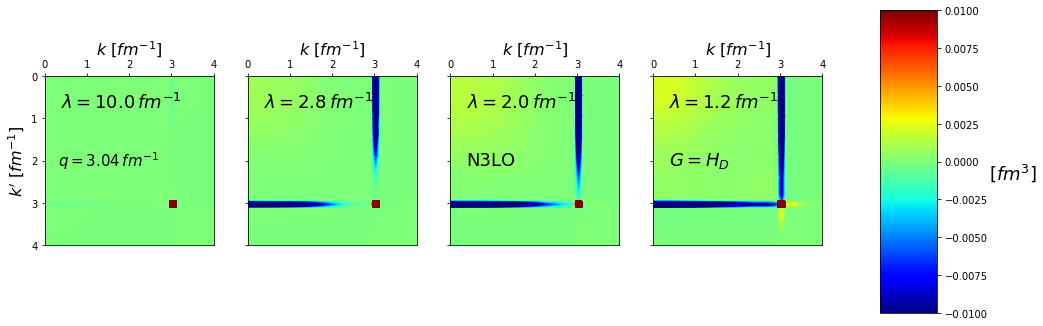

In [5]:
q = 3.0

momentum_proj_operator_contours(q, kvnn, channel, kmax, kmid, ntot, method, generator)